In [1]:
import nltk
nltk.download('punkt') #tokenize
nltk.download('wordnet') #lemmatize
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') #POS part of speech

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/menghsuanlee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/menghsuanlee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/menghsuanlee/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/menghsuanlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/menghsuanlee/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
d1 = "He is a good guy, he is not bad"
d2 = "feet wolves cooked boys girls, !<@!"
d3 = "He is not a good guy, he is bad"
c1 = [d1, d2, d3]

In [3]:
# tokenize option 1 , including comma in token
token_d1 = nltk.word_tokenize(d1)
print(token_d1)

['He', 'is', 'a', 'good', 'guy', ',', 'he', 'is', 'not', 'bad']


In [4]:
# tokenize 2, use white space as a separater
tokenizer1 = nltk.tokenize.WhitespaceTokenizer()
token_d12 = tokenizer1.tokenize(d1)
print(token_d12)

['He', 'is', 'a', 'good', 'guy,', 'he', 'is', 'not', 'bad']


## Bag of Words Vectorization

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
vec1 = CountVectorizer()
vec1.fit(c1) # fit the entire corpus, not a single sentence
print(vec1.vocabulary_) # show the index of words(alphabetically), not term frequency

{'he': 7, 'is': 8, 'good': 5, 'guy': 6, 'not': 9, 'bad': 0, 'feet': 3, 'wolves': 10, 'cooked': 2, 'boys': 1, 'girls': 4}


In [7]:
v1 = vec1.transform(c1)
print(v1.toarray())

[[1 0 0 0 0 1 1 2 2 1 0]
 [0 1 1 1 1 0 0 0 0 0 1]
 [1 0 0 0 0 1 1 2 2 1 0]]


## Stemming

In [8]:
token_d2 = nltk.word_tokenize(d2)
stemmer = nltk.stem.PorterStemmer()
stemmed_token_d2 = [stemmer.stem(token) for token in token_d2 if token.isalpha()] # apply stemmer on each token in d2
print(stemmed_token_d2)

['feet', 'wolv', 'cook', 'boy', 'girl']


In [9]:
lemmatizer = nltk.stem.WordNetLemmatizer()
lemmedtized_token_d2 = []
for token in token_d2:
    if token.isalpha():
        lemmedtized_token_d2.append(lemmatizer.lemmatize(token))
print(lemmedtized_token_d2)

['foot', 'wolf', 'cooked', 'boy', 'girl']


## Stop words

In [10]:
from nltk.corpus import stopwords
# append token to list if the token is not a stopword
stopwords_removed = [token for token in token_d1 if not token in stopwords.words('english')]
print(stopwords_removed)

['He', 'good', 'guy', ',', 'bad']


## Low Frequency Words Removing

In [11]:
# keep words appears at least 2 times in the doc c1
vec2 = CountVectorizer(min_df = 2)
vec2.fit(c1)
print(vec2.vocabulary_)

{'he': 3, 'is': 4, 'good': 1, 'guy': 2, 'not': 5, 'bad': 0}


In [12]:
c1

['He is a good guy, he is not bad',
 'feet wolves cooked boys girls, !<@!',
 'He is not a good guy, he is bad']

## TF-IDF with n-gram

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec3 = TfidfVectorizer(ngram_range = (1,2), min_df = 2 ) # single word & 2-grams
vec3.fit(c1)
print(vec3.vocabulary_)

{'he': 5, 'is': 7, 'good': 1, 'guy': 3, 'not': 9, 'bad': 0, 'he is': 6, 'good guy': 2, 'guy he': 4, 'is not': 8}


In [14]:
v3 = vec3.transform(c1)
print(v3.toarray())

[[0.22941573 0.22941573 0.22941573 0.22941573 0.22941573 0.45883147
  0.45883147 0.45883147 0.22941573 0.22941573]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.22941573 0.22941573 0.22941573 0.22941573 0.22941573 0.45883147
  0.45883147 0.45883147 0.22941573 0.22941573]]


## Part-of-Speech(POS)

In [15]:
d4 = "I drink water in parties"
d5 = "I grab a drink in parties"
c2 = [d4, d5]

In [16]:
# Steps:
# 1.Tokenize
# 2.POS tag
# 3.Normalization, stemming, stopwords...
# (have a list of tokens)
# 4.Concat tokens and their POS tags back to the document(a string)
# 5.Vectorizer

token_d4 = nltk.word_tokenize(d4)
pos_token_d4 = nltk.pos_tag(token_d4)
print(pos_token_d4)
# [('I', 'PRP'), ('drink', 'VBP'), ('water', 'NN'), ('in', 'IN'), ('parties', 'NNS')]



[('I', 'PRP'), ('drink', 'VBP'), ('water', 'NN'), ('in', 'IN'), ('parties', 'NNS')]


In [17]:
# create 'I_PRP', 'drink_VBP', ...
pos_c2 = [] # store the tagged doc
for doc in c2:
    token_doc = nltk.word_tokenize(doc)
    pos_token_doc = nltk.pos_tag(token_doc)
    temp = [] # store the token concat POS tag
    for i in pos_token_doc:
        temp.append(i[0]+'_'+i[1])
    pos_c2.append(" ".join(temp)) # turn into a doc, use space the separate
print(pos_c2)    

['I_PRP drink_VBP water_NN in_IN parties_NNS', 'I_PRP grab_VBP a_DT drink_NN in_IN parties_NNS']


In [18]:
vectorizer5 = TfidfVectorizer()
vectorizer5.fit(pos_c2)
print(vectorizer5.vocabulary_)

{'i_prp': 4, 'drink_vbp': 2, 'water_nn': 7, 'in_in': 5, 'parties_nns': 6, 'grab_vbp': 3, 'a_dt': 0, 'drink_nn': 1}


# Word2Vec

In [19]:
!pip install gensim

In [20]:
import gensim
import pandas as pd
df = pd.read_csv('quotetags.csv')
df.head()

,Tags,Author
0,"Albert Einstein,March,Germany,adulthood,succes...",Albert Einstein
1,"Marilyn Monroe,June,The United States,be-yours...",Marilyn Monroe
2,"J.K. Rowling,July,The United Kingdom,abilities...",J.K. Rowling
3,"Albert Einstein,March,Germany,change,deep-thou...",Albert Einstein
4,"Jane Austen,December,The United Kingdom,aliter...",Jane Austen


In [21]:
tags = [row.split(",") for row in df['Tags']]
tags

[['Albert Einstein', 'March', 'Germany', 'adulthood', 'success', 'value'],
 ['Marilyn Monroe',
  'June',
  'The United States',
  'be-yourself',
  'inspirational'],
 ['J.K. Rowling', 'July', 'The United Kingdom', 'abilities', 'choices'],
 ['Albert Einstein',
  'March',
  'Germany',
  'change',
  'deep-thoughts',
  'thinking',
  'world'],
 ['Jane Austen',
  'December',
  'The United Kingdom',
  'aliteracy',
  'books',
  'classic',
  'humor'],
 ['Steve Martin', 'August', 'The United States', 'humor', 'obvious', 'simile'],
 ['Eleanor Roosevelt',
  'October',
  'The United States',
  'misattributed-eleanor-roosevelt'],
 ['Albert Einstein',
  'March',
  'Germany',
  'inspirational',
  'life',
  'live',
  'miracle',
  'miracles'],
 ['Andre Gide', 'November', 'France', 'life', 'love'],
 ['Thomas A. Edison',
  'February',
  'The United States',
  'edison',
  'failure',
  'inspirational',
  'paraphrased'],
 ['Allen Saunders',
  'April',
  'The United States',
  'fate',
  'life',
  'misattribute

In [23]:
# min_count: word appearance >= 1, vector_size: nerons in the hidden layer, workers: cores to compute
# window: n-gram window size, sg: use skip-gram
model = gensim.models.Word2Vec(tags, min_count=1, vector_size=20, workers=3, window=3, sg=1)

In [24]:
model.wv.__getitem__('Albert Einstein')

array([-0.02776789,  0.00836551, -0.00406576,  0.03451859,  0.01988194,
        0.02259276,  0.0071109 , -0.01345244, -0.02218077, -0.00485056,
        0.00776846, -0.01369683, -0.03530609, -0.03932138, -0.0453657 ,
       -0.02985048, -0.00880505, -0.02126941, -0.03225451, -0.0193428 ],
      dtype=float32)

In [25]:
model.wv.similarity('Albert Einstein', 'Marilyn Monroe')

0.009445123

In [26]:
model.wv.most_similar('Albert Einstein')

[('understanding', 0.4898354411125183),
 ('alcohol', 0.4558295011520386),
 ('April', 0.4352729916572571),
 ('adventure', 0.42612791061401367),
 ('marriage', 0.41895952820777893),
 ('Jane Austen', 0.41076746582984924),
 ('beatles', 0.4019605815410614),
 ('George Carlin', 0.3688918650150299),
 ('world', 0.3586214780807495),
 ('Ireland', 0.35614296793937683)]

In [27]:
## TSNE plot
# t-distributed stochastic neigborhood embedding
from sklearn.manifold import TSNE

authors = df['Author'].unique().tolist()
X = model.wv.__getitem__(authors)

In [28]:
# transform originally 20 dimensions to 2 dims in order to plot
tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1000, random_state=100)
Y = tsne_model.fit_transform(X)

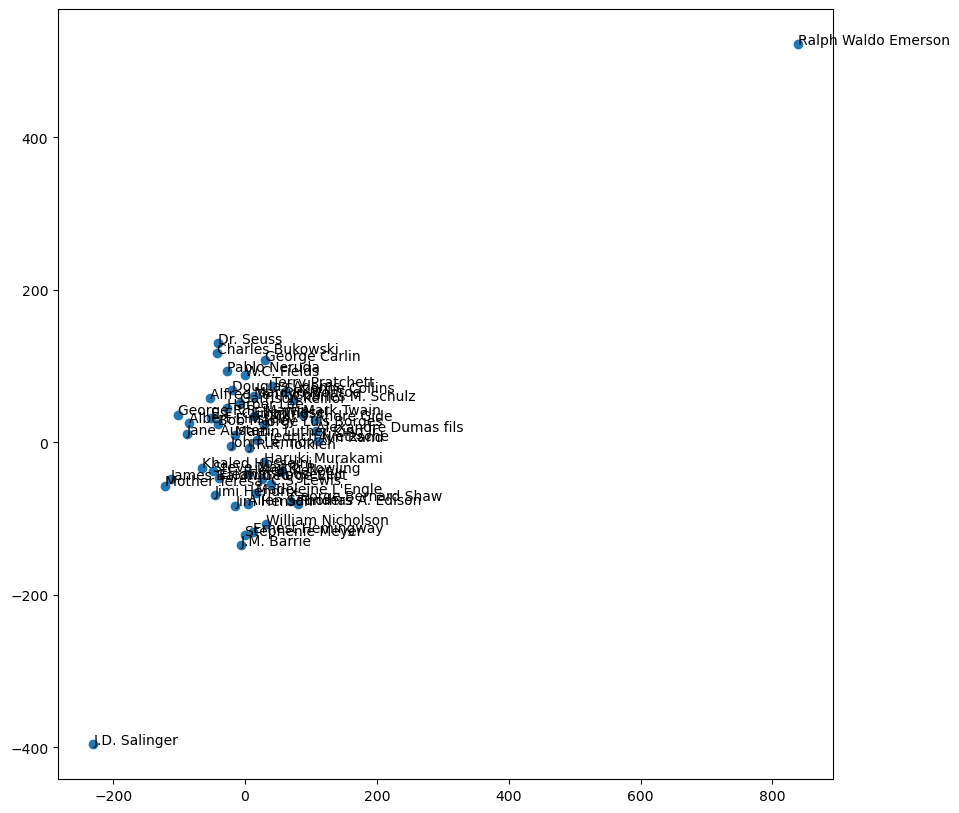

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Y[:,0], Y[:,1])

for i, author in enumerate(authors): #enumerate can create index
    plt.annotate(author, xy=(Y[i,0], Y[i,1]))